회귀직선
==
붓꽃 꽃잎길이 예측, 
--

몸무게 예측
--


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split


In [4]:
x =np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
x.reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
x.reshape(-1,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [7]:
from sklearn import datasets 
iris = datasets.load_iris() 
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [8]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [10]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

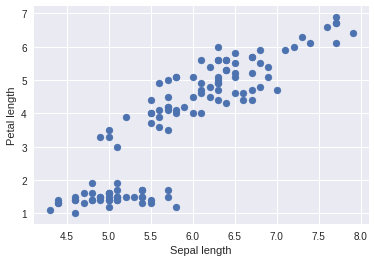

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

In [16]:
from sklearn.linear_model import LinearRegression 
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))


Score : 0.655


In [17]:
print(linr.coef_) 
print(linr.intercept_)

[1.8699969]
-7.233315234253802


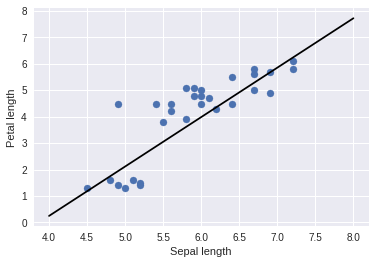

In [18]:
plt.scatter(X_test, y_test, marker='o') 
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

XX = np.linspace(4, 8, 3)
plt.plot(XX, linr.coef_ * XX + linr.intercept_, "k-")

## 몸무게 예측

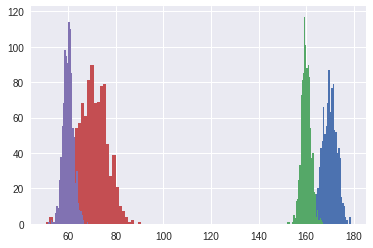

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[2.00518104]
0.86492527778384


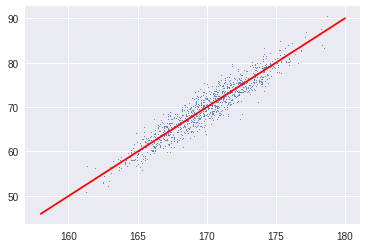

In [21]:
xs = np.linspace(158,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[0.98191392]
-97.09241946972867
0.7961658200963633


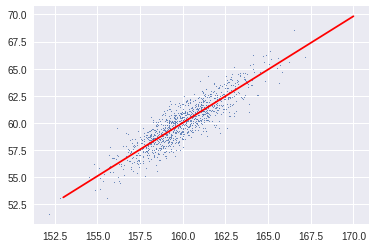

In [23]:
xs = np.linspace(153,170,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

In [24]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.12113393]
-120.04962995056503
0.8684174257387697


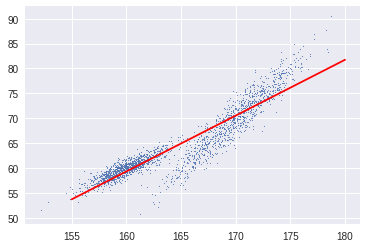

In [25]:
xs = np.linspace(155,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [34]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
#인덱스를 새로 부여 할때
X = pd.concat([X1, X2], ignore_index=True)
X

,height,sex
0,174.740039,0
1,174.570338,0
2,168.459840,0
3,174.211580,0
4,166.949789,0
5,171.009822,0
6,173.198769,0
7,169.545272,0
8,170.695815,0
9,169.048858,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_)
print(leg.intercept_)
print(leg.score(X_test, y_test))

[1.68018486 6.91642457]
-215.70060025273477
0.904427592506698


In [36]:
X_train[:10]

,height,sex
1431,158.136133,1
242,164.238525,0
323,172.384897,0
398,164.937430,0
1038,158.279165,1
1131,160.197778,1
1755,157.979542,1
1953,158.637389,1
543,176.043466,0
306,165.737797,0


## 교차검증

In [37]:
from sklearn.cross_validation import cross_val_score, KFold

ModuleNotFoundError: ignored

In [38]:
X.shape[1]

2

In [0]:
cross_val = KFold(X.shape[0], 10, shuffle=True)
print(cross_val_score(leg, X, y, cv=cross_val))

[0.91730411 0.92643381 0.88982475 0.92241677 0.92051448 0.92369165
 0.92280979 0.92172595 0.91799853 0.9232087 ]


## 결정트리를 이용한 회귀 (뒤에서 설명함)

In [0]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print(dec_reg.score(X_test, y_test))

0.8837243668233168
